<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/feature_select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공모주 시초가 예측 baseline(내가 개인적으로 추가한 6가지 변수를 제외해야 완전한 베이스 라인이 될 것이다.

In [1]:
# !unzip /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.zip -d /content/drive/MyDrive/인공지능/경영빅데이터/data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import pointbiserialr

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPO원본_resampled_data.csv')

## 데이터 기본 정보 파악

In [6]:
df.head()

,신규상장일,최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,청약경쟁률,...,구주매출(비율),매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(비율),종속변수
0,20230524,4,12,0.33,34400,39700,43000,1.08,1669.60,823.74,...,0.0,43973,14264,2121,0.69,0.06,0.25,12700000,0.2569,0
1,20230519,4,11,0.36,7500,9800,9800,1.00,1715.41,1785.11,...,0.0,12014,2134,1239,0.74,0.01,0.25,12400000,0.2474,1
2,20230519,4,11,0.36,17200,23200,15000,0.65,86.44,53.06,...,0.0,12273,-1686,5048,0.70,0.05,0.25,9966633,0.4903,0
3,20230517,4,10,0.40,10000,12000,12000,1.00,1688.87,1481.83,...,0.0,35980,852,1099,0.75,0.00,0.25,11000000,0.3809,0
4,20230504,7,13,0.54,16000,18000,18000,1.00,854.29,994.80,...,0.0,8868,-5242,5496,0.75,0.00,0.25,11000000,0.2690,0


In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   신규상장일                            836 non-null    int64  
 1   최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  836 non-null    int64  
 2   최근 3개월 공모주 수                     836 non-null    int64  
 3   최근 "따" 비율                        836 non-null    float64
 4   희망공모가_하한                         836 non-null    int64  
 5   희망공모가_상한                         836 non-null    int64  
 6   공모가                              836 non-null    int64  
 7   밴드수익률(공모가/공모가_상한)                836 non-null    float64
 8   기관경쟁률                            836 non-null    float64
 9   청약경쟁률                            836 non-null    float64
 10  의무보유확약                           836 non-null    float64
 11  대표주간사                            836 non-null    int64  
 12  IPO 주간사 순위            

In [8]:
print(df.describe())

              신규상장일  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  최근 3개월 공모주 수  \
count  8.360000e+02                       836.000000    836.000000   
mean   2.019278e+07                         3.952153     16.806220   
std    2.253218e+04                         3.435651      5.884783   
min    2.015053e+07                         0.000000      1.000000   
25%    2.017701e+07                         1.000000     13.000000   
50%    2.019522e+07                         3.000000     17.000000   
75%    2.021070e+07                         6.000000     21.000000   
max    2.023052e+07                        17.000000     34.000000   

        최근 "따" 비율       희망공모가_하한       희망공모가_상한            공모가  \
count  836.000000     836.000000     836.000000     836.000000   
mean     0.239360   14581.257177   17481.562201   16617.692584   
std      0.174117   14531.968021   16916.350390   14012.234378   
min      0.000000    1450.000000    1550.000000    1300.000000   
25%      0.110000    7920.750000    949

In [9]:
print(df.isnull().sum())


신규상장일                              0
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)    0
최근 3개월 공모주 수                       0
최근 "따" 비율                          0
희망공모가_하한                           0
희망공모가_상한                           0
공모가                                0
밴드수익률(공모가/공모가_상한)                  0
기관경쟁률                              0
청약경쟁률                              0
의무보유확약                             0
대표주간사                              0
IPO 주간사 순위                         0
총 공모주식 수                           0
구주매출(비율)                           0
매출액(백만원)                           0
순이익(백만원)                           0
자본금(백만원)                           0
전문투자자(비율)                          0
우리사주조합(비율)                         0
일반청약자(비율)                          0
공모후 상장주식수(주식수)                     0
유통가능주식합계(비율)                       0
종속변수                               0
dtype: int64


## feature select

### 1) 상관관계 분석(t-검정이었나)

In [11]:
import pandas as pd

# 데이터프레임 df를 가정합니다. 이 데이터프레임은 위에서 언급한 모든 변수를 포함합니다.
correlation_matrix = df.corr()

print(correlation_matrix)


                                    신규상장일  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  \
신규상장일                            1.000000                         0.440683   
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  0.440683                         1.000000   
최근 3개월 공모주 수                     0.080535                         0.373606   
최근 "따" 비율                        0.452443                         0.885369   
희망공모가_하한                        -0.000200                        -0.052202   
희망공모가_상한                         0.008197                        -0.042392   
공모가                              0.001141                        -0.005800   
밴드수익률(공모가/공모가_상한)                0.068436                         0.222637   
기관경쟁률                            0.572111                         0.464015   
청약경쟁률                           -0.045102                         0.008205   
의무보유확약                          -0.124621                         0.073144   
대표주간사                           -0.215252                       

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


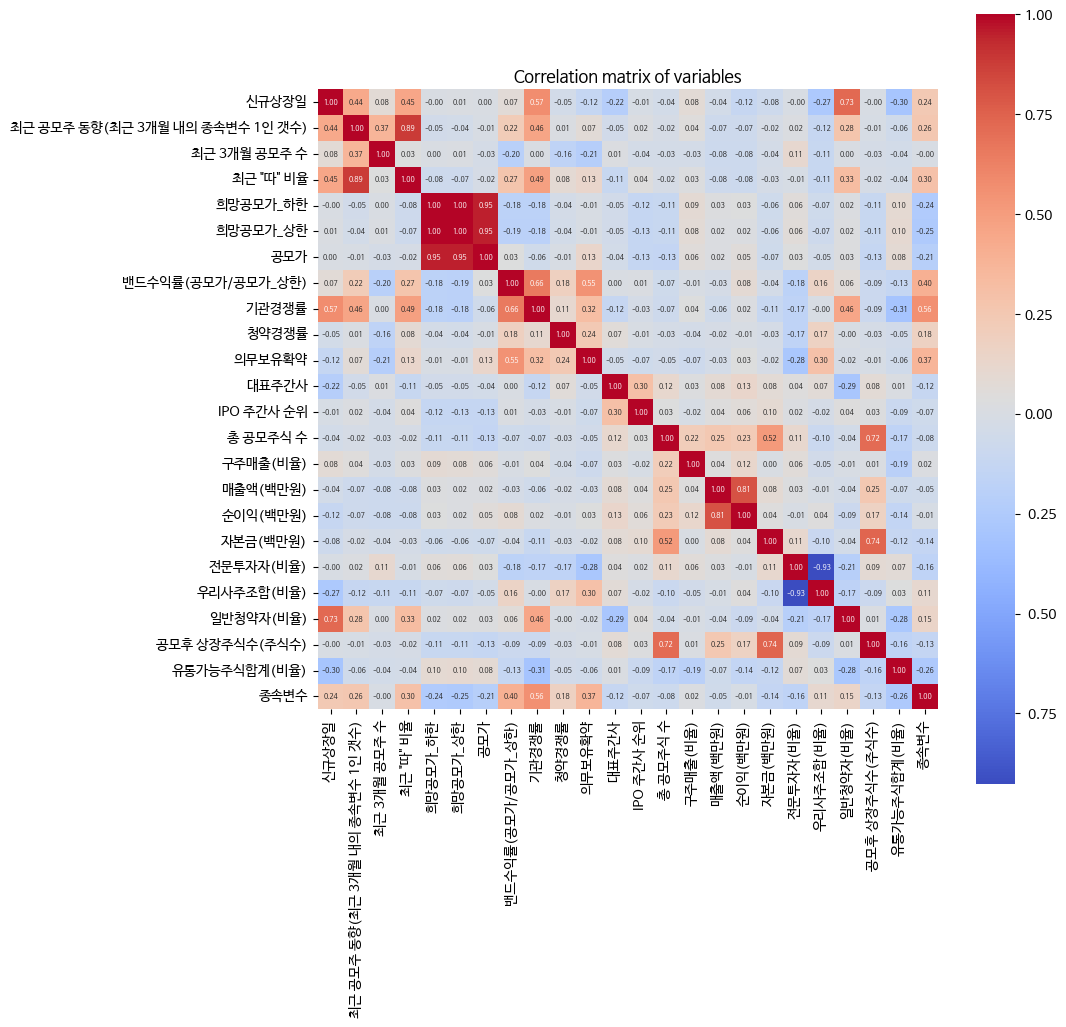

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap = 'coolwarm' , annot_kws={"size": 5})
plt.title('Correlation matrix of variables')
plt.show()


In [13]:
from scipy.stats import pointbiserialr

X = df.drop('종속변수',  axis=1)
y = df['종속변수']
# y는 이진변수, X는 연속 변수를 나타내는 DataFrame을 가정합니다.
# 각 피처와 목표 변수 사이의 point-biserial correlation 계산
for column in X.columns:
    pbc = pointbiserialr(X[column], y)
    print(f"The correlation between {column} and 종속변수 is {pbc.correlation}")


The correlation between 신규상장일 and 종속변수 is 0.2404858268141523
The correlation between 최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수) and 종속변수 is 0.2584928421450418
The correlation between 최근 3개월 공모주 수 and 종속변수 is -0.0036609659967692127
The correlation between 최근 "따" 비율 and 종속변수 is 0.2985065035002461
The correlation between 희망공모가_하한 and 종속변수 is -0.24461965098452415
The correlation between 희망공모가_상한 and 종속변수 is -0.2501083902283743
The correlation between 공모가 and 종속변수 is -0.20625127540829605
The correlation between 밴드수익률(공모가/공모가_상한) and 종속변수 is 0.4021125293829555
The correlation between 기관경쟁률 and 종속변수 is 0.5585631424322908
The correlation between 청약경쟁률 and 종속변수 is 0.1762230485369276
The correlation between 의무보유확약 and 종속변수 is 0.37414615064687795
The correlation between 대표주간사 and 종속변수 is -0.11576391822278778
The correlation between IPO 주간사 순위 and 종속변수 is -0.06759924576586636
The correlation between 총 공모주식 수 and 종속변수 is -0.07697123841376265
The correlation between 구주매출(비율) and 종속변수 is 0.015173688654750259
Th

### 2) 로지스틱회귀분석

In [24]:
import statsmodels.api as sm

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('종속변수', axis=1)
y = df['종속변수']

# 로지스틱 회귀 모델 생성
logit_model = sm.Logit(y, sm.add_constant(X))

# 모델 훈련
result = logit_model.fit()

# 결과 출력
result.summary2()


Optimization terminated successfully.
         Current function value: 0.337779
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                  Pseudo R-squared:       0.513      
Dependent Variable:         종속변수                   AIC:                    612.7670   
Date:                       2023-06-02 15:39       BIC:                    726.2541   
No. Observations:           836                    Log-Likelihood:         -282.38    
Df Model:                   23                     LL-Null:                -579.47    
Df Residuals:               812                    LLR p-value:            7.6182e-111
Converged:                  1.0000                 Scale:                  1.0000     
No. Iterations:             11.0000                                                   
--------------------------------------------------------------------------------------
                                  Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
--------------------------------------------------------------------------------------
const                           -774.2215 216.7854 -3.5714 0.0004 -1199.1130 -349.3300
신규상장일                              0.0000   0.0000  3.5946 0.0003     0.0000    0.0001
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)   -0.1825   0.1032 -1.7686 0.0770    -0.3848    0.0197
최근 3개월 공모주 수                       0.0588   0.0280  2.1013 0.0356     0.0040    0.1137
최근 "따" 비율                          3.4049   1.8193  1.8715 0.0613    -0.1609    6.9708
희망공모가_하한                           0.0000   0.0002  0.2021 0.8398    -0.0003    0.0004
희망공모가_상한                          -0.0000   0.0001 -0.0476 0.9620    -0.0003    0.0003
공모가                               -0.0001   0.0001 -1.8966 0.0579    -0.0003    0.0000
밴드수익률(공모가/공모가_상한)                 -0.9445   1.8333 -0.5152 0.6064    -4.5378    2.6487
기관경쟁률                             -0.0001   0.0005 -0.1661 0.8681    -0.0011    0.0009
청약경쟁률                              0.0024   0.0003  7.1518 0.0000     0.0017    0.0031
의무보유확약                             8.1128   1.0600  7.6537 0.0000     6.0353   10.1903
대표주간사                             -0.0532   0.0211 -2.5165 0.0119    -0.0946   -0.0118
IPO 주간사 순위                        -0.0045   0.0228 -0.1991 0.8421    -0.0493    0.0402
총 공모주식 수                           0.0000   0.0000  0.6835 0.4943    -0.0000    0.0000
구주매출(비율)                          -1.1817   0.8541 -1.3836 0.1665    -2.8557    0.4923
매출액(백만원)                           0.0000   0.0000  0.3784 0.7052    -0.0000    0.0000
순이익(백만원)                          -0.0000   0.0000 -0.3202 0.7488    -0.0000    0.0000
자본금(백만원)                          -0.0000   0.0000 -0.1035 0.9176    -0.0000    0.0000
전문투자자(비율)                         17.2729  54.6728  0.3159 0.7521   -89.8837  124.4296
우리사주조합(비율)                        19.6695  54.5726  0.3604 0.7185   -87.2908  126.6298
일반청약자(비율)                        -11.0366  55.4869 -0.1989 0.8423  -119.7889   97.7157
공모후 상장주식수(주식수)                    -0.0000   0.0000 -3.1295 0.0018    -0.0000   -0.0000
유통가능주식합계(비율)                      -4.6635   1.0610 -4.3954 0.0000    -6.7430   -2.5840
======================================================================================

"""

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


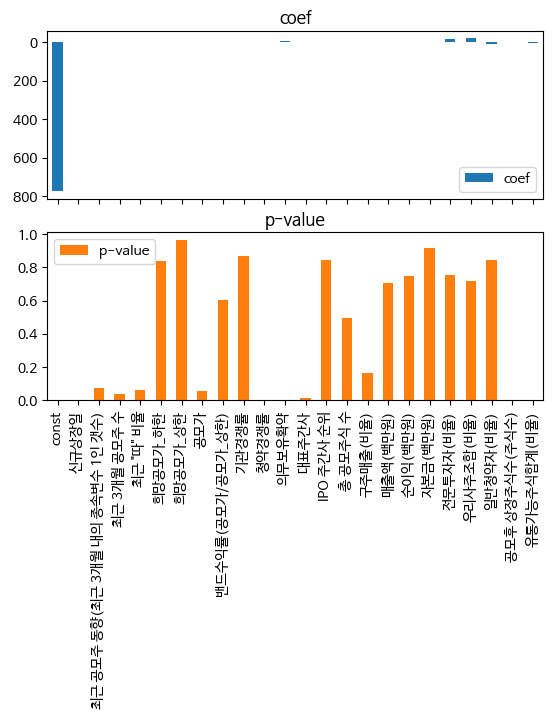

In [25]:
import matplotlib.pyplot as plt

# p-values와 회귀 계수를 DataFrame으로 변환
coef = pd.DataFrame({'coef': result.params, 'p-value': result.pvalues})

# bar plot 그리기
coef.plot(kind='bar', subplots=True)
plt.show()


### 3) 결정나무 CART


Accuracy:  0.8273809523809523
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83        84
           1       0.82      0.83      0.83        84

    accuracy                           0.83       168
   macro avg       0.83      0.83      0.83       168
weighted avg       0.83      0.83      0.83       168



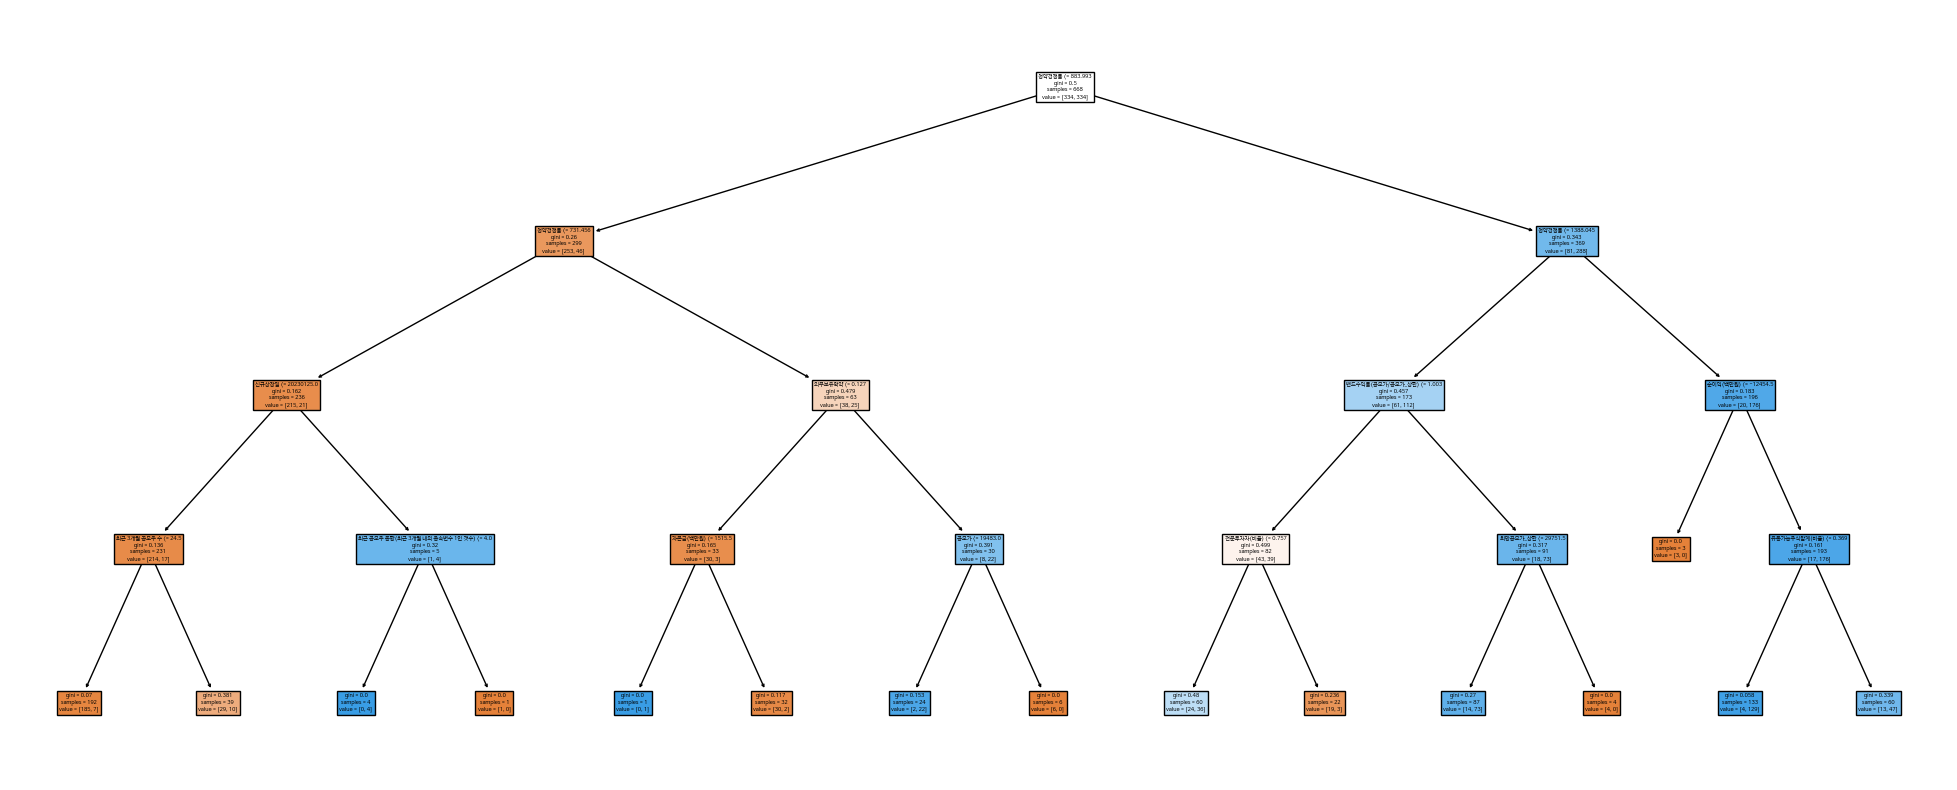

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
dtc = DecisionTreeClassifier(criterion="gini", max_depth=4)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Measure the performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(25,10))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()


### 4) 결정나무 C 5.0

Accuracy:  0.8214285714285714
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        84
           1       0.84      0.80      0.82        84

    accuracy                           0.82       168
   macro avg       0.82      0.82      0.82       168
weighted avg       0.82      0.82      0.82       168



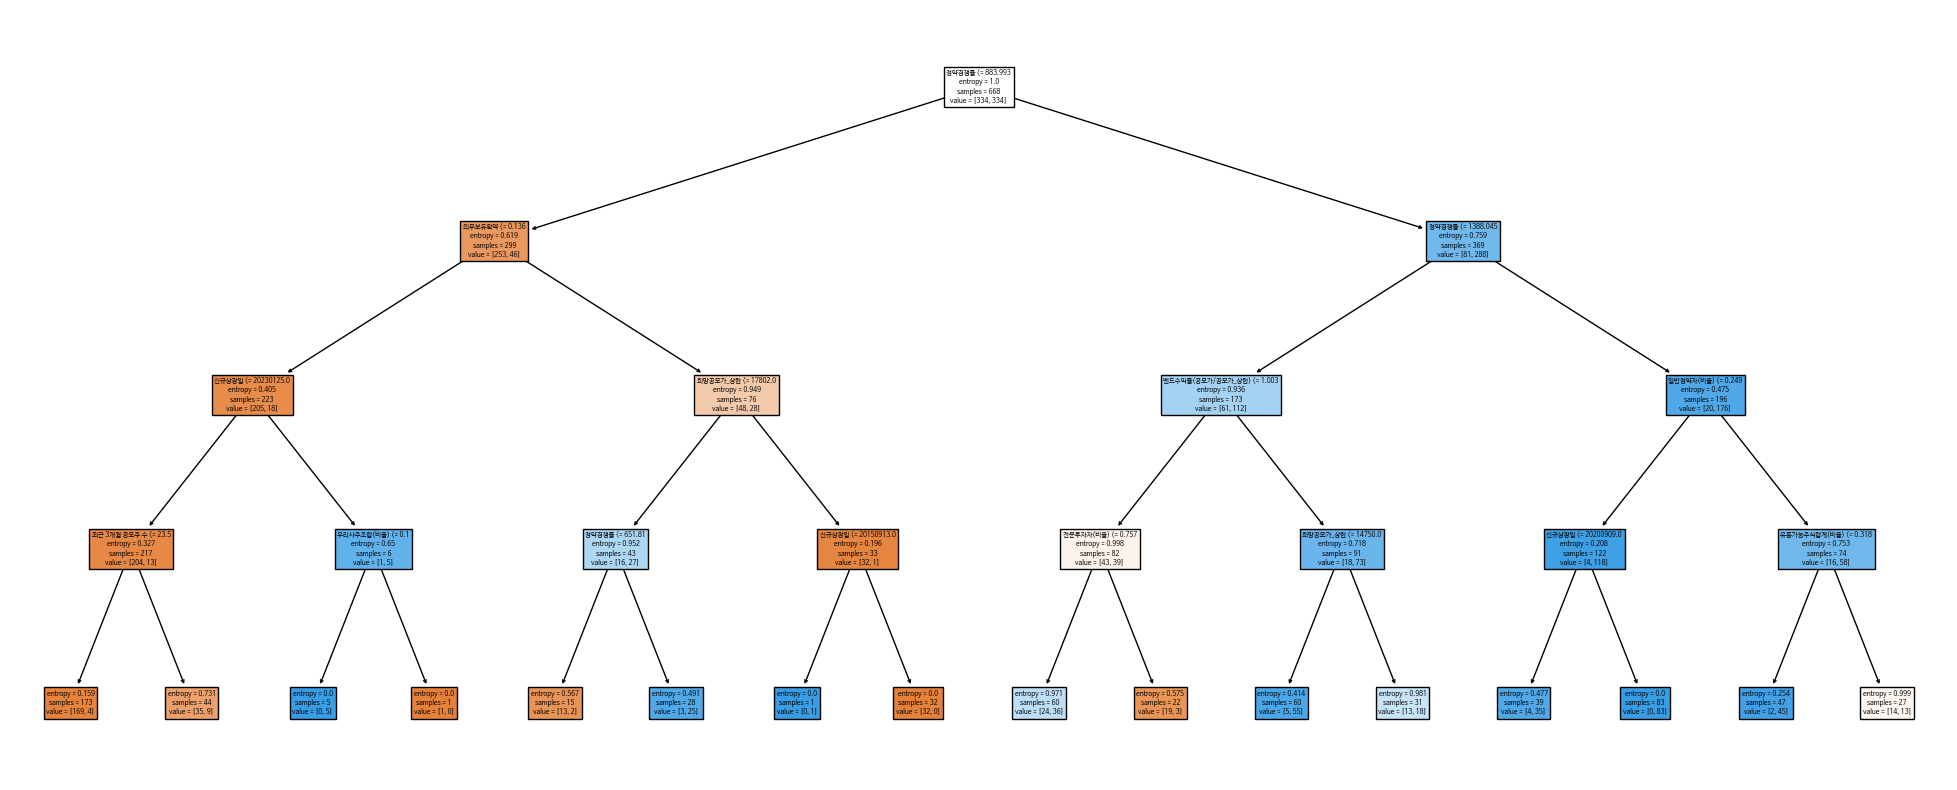

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Measure the performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(25,10))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()


## 모델

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [19]:
X = df.drop('종속변수', axis=1)
y = df['종속변수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Decision Tree (CART)
tree_cart = DecisionTreeClassifier(criterion='gini')  # CART는 'gini' 기준을 사용
tree_cart.fit(X_train, y_train)

# Decision Tree (C5.0) - sklearn에는 C5.0 알고리즘이 없으므로, CART를 사용하거나 별도의 라이브러리가 필요합니다.

# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam')
mlp.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier(hidden_layer_sizes=(10,))

In [21]:
print("Logistic Regression Score: ", logreg.score(X_test, y_test))
print("Decision Tree (CART) Score: ", tree_cart.score(X_test, y_test))
# print("Decision Tree (C5.0) Score: ", ???)  # C5.0의 경우 별도 처리 필요
print("Neural Network Score: ", mlp.score(X_test, y_test))


Logistic Regression Score:  0.8333333333333334
Decision Tree (CART) Score:  0.7916666666666666
Neural Network Score:  0.5


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# 각 모델에 대한 예측값 생성
logreg_pred = logreg.predict(X_test)
tree_cart_pred = tree_cart.predict(X_test)
mlp_pred = mlp.predict(X_test)

# Logistic Regression의 성능 평가
print("Logistic Regression: ")
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

# Decision Tree (CART)의 성능 평가
print("\nDecision Tree (CART): ")
print(confusion_matrix(y_test, tree_cart_pred))
print(classification_report(y_test, tree_cart_pred))

# Neural Network의 성능 평가
print("\nNeural Network: ")
print(confusion_matrix(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))


Logistic Regression: 
[[63 21]
 [ 7 77]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        84
           1       0.79      0.92      0.85        84

    accuracy                           0.83       168
   macro avg       0.84      0.83      0.83       168
weighted avg       0.84      0.83      0.83       168


Decision Tree (CART): 
[[68 16]
 [19 65]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        84
           1       0.80      0.77      0.79        84

    accuracy                           0.79       168
   macro avg       0.79      0.79      0.79       168
weighted avg       0.79      0.79      0.79       168


Neural Network: 
[[45 39]
 [45 39]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        84
           1       0.50      0.46      0.48        84

    accuracy                           0.50       168
   macr

## 추가로 해야할 작업들
- 데이터의 정규화나 표준화, 이상치 처리, 변수 변환(로그 변환 등)을 수행하여 종속변수와의 상관관계를 높이기
- 총 16가지 변수를 사용하였다. 
 - 이를 선택한 기준은 기존 교수님이 제공해준 변수에 6가지 변수를 더 추가하였다. 
 - 그렇기 때문에 기존 변수로 작업했을때 성능과 6가지를 다 사용했을 때의 성능
 - 그리고 6개 중에서 상관관계가 유의미한 변수만 사용했을 때의 성능 세가지를 비교할 필요가 있다.
 - 물론 조건은 같은 모델이여야 한다.
- 그리드 서치, 랜덤포레스트, 유전알고리즘 등을 활용하여 최적의 해를 찾아서 모델 고도화하기

> 결론적으로 
 - 데이터 품질 향상 미작업 + 교수님 제공 변수 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수에 추가로 6가지 변수 사용 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수에 추가로 6가지 변수중 유의미한 변수 사용 + 기본 하이퍼파라미터
 - 위의 것을 통해서 최적의 데이터 상태가 파악되면 하이퍼파라미터를 그리드서치, 랜덤서치등으로 고도화작업
 
 
- 마지막 결과 해석
 - 새로 추가한 변수가 미치는 영향
  - 상관관계
  - 실제 모델 결과
 - 모델별로 성능이 상이한데 더 좋은 성능의 모델이 있다면 왜 더 좋은지
 - 평가지표에서 recall precision, f1-score, accuracy가 있는데 여기에서는 무엇을 더 중요하게 봐야 하는지
 - 데이터 품질 개선을 위해서 어떤 기법을 왜 사용하였는가?

 
